# This my player analysis for players in FIFA 19

In [1]:
# First we are going to import the necessary packages

# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Import the data
df = pd.read_csv("C:/Users/Christian/OneDrive/fifa19_analysis/data.csv")

## Standard data manipulation

In [3]:
#See if data is loaded correctly
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


#### Basic stats about our dataset

In [4]:
df.shape

(18207, 89)

In [5]:
#Show the info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
Unnamed: 0                  18207 non-null int64
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null fl

#### Check the columns in the dataset and pick the columns we will work with:

In [6]:
#Check name of columns in the dataset
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [7]:
# Select the columns we will work with
chosen_columns = [
    'Name',
    'Age',
    'Nationality',
    'Overall',
    'Club',
    'Special',
    'Preferred Foot',
    'International Reputation',
    'Weak Foot',
    'Skill Moves',
    'Work Rate',
    'Position',
    'Height',
    'Weight',
    'Crossing',
    'Finishing', 
    'HeadingAccuracy', 
    'ShortPassing', 
    'Volleys', 
    'Dribbling',
    'Curve', 
    'FKAccuracy', 
    'LongPassing', 
    'BallControl', 
    'Acceleration',
    'SprintSpeed', 
    'Agility', 
    'Reactions', 
    'Balance', 
    'ShotPower',
    'Jumping', 
    'Stamina', 
    'Strength', 
    'LongShots', 
    'Aggression',
    'Interceptions', 
    'Positioning', 
    'Vision', 
    'Penalties', 
    'Composure',
    'Marking', 
    'StandingTackle', 
    'SlidingTackle', 
    'GKDiving', 
    'GKHandling',
    'GKKicking', 
    'GKPositioning', 
    'GKReflexes']

In [8]:
#Creating a DataFrame for the chosen columns
df_fifa = pd.DataFrame(df, columns = chosen_columns)

#### We want to check for NaN values and replace them:

In [9]:
df_fifa.isnull().sum()

Name                          0
Age                           0
Nationality                   0
Overall                       0
Club                        241
Special                       0
Preferred Foot               48
International Reputation     48
Weak Foot                    48
Skill Moves                  48
Work Rate                    48
Position                     60
Height                       48
Weight                       48
Crossing                     48
Finishing                    48
HeadingAccuracy              48
ShortPassing                 48
Volleys                      48
Dribbling                    48
Curve                        48
FKAccuracy                   48
LongPassing                  48
BallControl                  48
Acceleration                 48
SprintSpeed                  48
Agility                      48
Reactions                    48
Balance                      48
ShotPower                    48
Jumping                      48
Stamina 

In [10]:
#Replace the NaN values in column (Position, International Reputation, Preferred Foot, Club, Weak Foot, Skill Moves)

In [11]:
#Check 3 random rows to if all is good
df_fifa.sample(3)

,Name,Age,Nationality,Overall,Club,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
7127,Kaio Figueiras,26,Brazil,68,Atlético Paranaense,1842,Left,1.0,2.0,2.0,...,52.0,56.0,67.0,63.0,62.0,18.0,12.0,14.0,17.0,18.0
2675,Rodrigo Galo,31,Brazil,73,AEK Athens,1939,Right,1.0,3.0,3.0,...,57.0,63.0,68.0,72.0,72.0,14.0,6.0,16.0,11.0,11.0
7825,Clemente,34,Portugal,67,Santa Clara,1566,Right,1.0,3.0,3.0,...,66.0,65.0,28.0,18.0,22.0,13.0,7.0,10.0,13.0,9.0


## Start of data visualization and player analysis

In [12]:
#Show 5 best players
top5_Overall = df_fifa.sort_values("Overall", ascending=False)[["Name", "Overall", "Age", "Nationality", "Club"]].head(5)
top5_Overall.set_index("Name", inplace=True)
print(top5_Overall)

                   Overall  Age Nationality                 Club
Name                                                            
L. Messi                94   31   Argentina         FC Barcelona
Cristiano Ronaldo       94   33    Portugal             Juventus
Neymar Jr               92   26      Brazil  Paris Saint-Germain
De Gea                  91   27       Spain    Manchester United
K. De Bruyne            91   27     Belgium      Manchester City


#### Analysis about players age:

In [13]:
#How many of each age
df_fifa.Age.value_counts()

21    1423
26    1387
24    1358
22    1340
23    1332
25    1319
20    1240
27    1162
28    1101
19    1024
29     959
30     917
18     732
31     707
32     574
33     408
34     404
17     289
35     196
36     127
37      82
16      42
38      37
39      25
40      13
41       5
44       2
42       1
45       1
Name: Age, dtype: int64

In [14]:
#Create a Numpy array so we can use it in our histogram
x = np.array(df_fifa.Age)

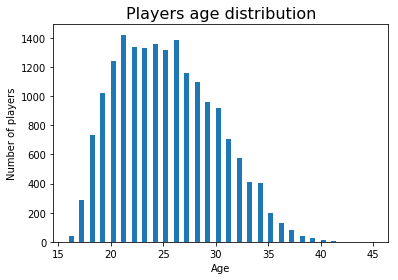

In [15]:
#Now we will make a histogram over many players at each age
plt.hist(x, bins = 58)
plt.xlabel("Age")
plt.ylabel("Number of players")
plt.title("Players age distribution", fontsize=16)
plt.show()

In [16]:
#Oldest players
oldest_players = df_fifa.sort_values("Age", ascending=False)[["Name", "Nationality", "Club", "Position", "Age"]].head(10)
oldest_players.set_index("Name", inplace=True)
print(oldest_players)

                     Nationality                          Club Position  Age
Name                                                                        
O. Pérez                  Mexico                       Pachuca       GK   45
K. Pilkington            England              Cambridge United       GK   44
T. Warner      Trinidad & Tobago            Accrington Stanley       GK   44
S. Narazaki                Japan                Nagoya Grampus       GK   42
C. Muñoz               Argentina  CD Universidad de Concepción       GK   41
J. Villar               Paraguay                           NaN       GK   41
H. Sulaimani        Saudi Arabia                     Ohod Club       LB   41
M. Tyler                 England           Peterborough United       GK   41
B. Nivet                  France                  ESTAC Troyes      CAM   41
F. Kippe                  Norway                 Lillestrøm SK      LCB   40


In [17]:
#See the youngest players
youngest_players.sort_values("Age")[["Name", "Nationality", "Club", "Position", "Age"]].head(10)
youngest_players.set_index("Name", inplace=True)
print(youngest_players)

NameError: name 'youngest_players' is not defined

In [ ]:
# Players age distribution in top 6 Premier League teams
# First we make a varibel string with name of the clubs
selected_clubs = ("Liverpool", "Manchester City", "Chelsea", "Manchester United", "Tottenham", "Arsenal")
# Then we assign the value from the data set
top6_clubs = df_fifa[df_fifa["Club"].isin(selected_clubs) & df_fifa["Age"]]

#Then we make a violin plot
sns.violinplot(x="Club", y="Age",data=top6_clubs)
sns.set_context("paper")

In [ ]:
#Now we will show the correlation between different age and stamina, international reputation, sprint speed, acceleration
#Do it through a scatter plot
